In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("data222.csv")

In [3]:
df.head()

,Customer Age,Gender,Body Mass,Kids,Is he smoker,Regional Info,Cost
0,19,female,27.900,0,yes,southwest,16884.924
1,18,male,33.770,1,no,southeast,1725.5523
2,28,male,33.000,3,no,southeast,4449.462
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.8552


In [4]:
#length of data
len(df)

1338

In [5]:
#checking the type of attributes
print(df.dtypes)

Customer Age      object
Gender            object
Body Mass        float64
Kids              object
Is he smoker      object
Regional Info     object
Cost              object
dtype: object


In [6]:
#renaming the column name
df4 = df.rename(columns={'Customer Age':'Age','Body Mass':'BodyMass','Is he smoker':'smoker'})
df4

,Age,Gender,BodyMass,Kids,smoker,Regional Info,Cost
0,19,female,27.900,0,yes,southwest,16884.924
1,18,male,33.770,1,no,southeast,1725.5523
2,28,male,33.000,3,no,southeast,4449.462
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.8552
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.5483
1334,18,female,31.920,0,no,northeast,2205.9808
1335,18,female,36.850,0,no,southeast,1629.8335
1336,21,female,25.800,0,no,southwest,2007.945


In [7]:
#converting objects to float or int
df4.Cost = pd.to_numeric(df4.Cost,errors='coerce')
df4.Age = pd.to_numeric(df4.Age,errors='coerce')
df4.Kids = pd.to_numeric(df4.Kids,errors='coerce')


In [8]:
#checking the null values
round(df4.isnull().sum()/len(df4)*100,2)

Age              0.07
Gender           1.27
BodyMass         1.12
Kids             0.97
smoker           0.67
Regional Info    0.45
Cost             0.67
dtype: float64

#summery of numerical attributes
1.Age- Age of the primary customer of Insurance company
2.kids- Number of children to customer.
3.cost- Medical bills claimed by insurance company to there customers

In [9]:
#checking mean median and mode
df4.describe()

,Age,BodyMass,Kids,Cost
count,1337.000000,1323.000000,1325.000000,1329.000000
mean,39.188482,30.651727,1.095094,13317.728835
std,14.038828,6.103401,1.207985,12132.729577
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.255000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9411.005000
75%,51.000000,34.637500,2.000000,16796.411940
max,64.000000,53.130000,5.000000,63770.428010


#### Detection of outliars using boxplot

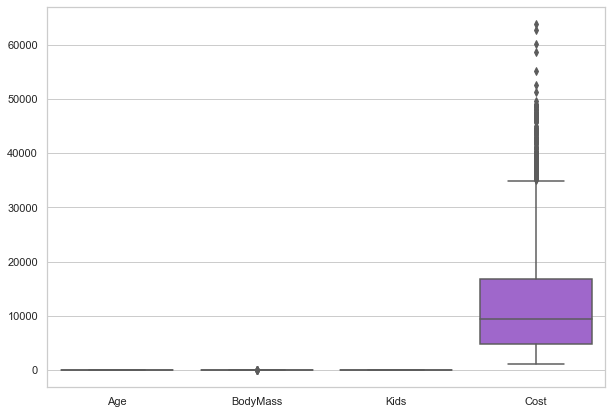

In [10]:
plt.figure(figsize=[10,7])
sns.set(style='whitegrid')
sns.boxplot(data=df4,palette='hls')

#### Detecting the outliars using scatterplot


C:\Users\Krishna Vamshi\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Krishna Vamshi\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


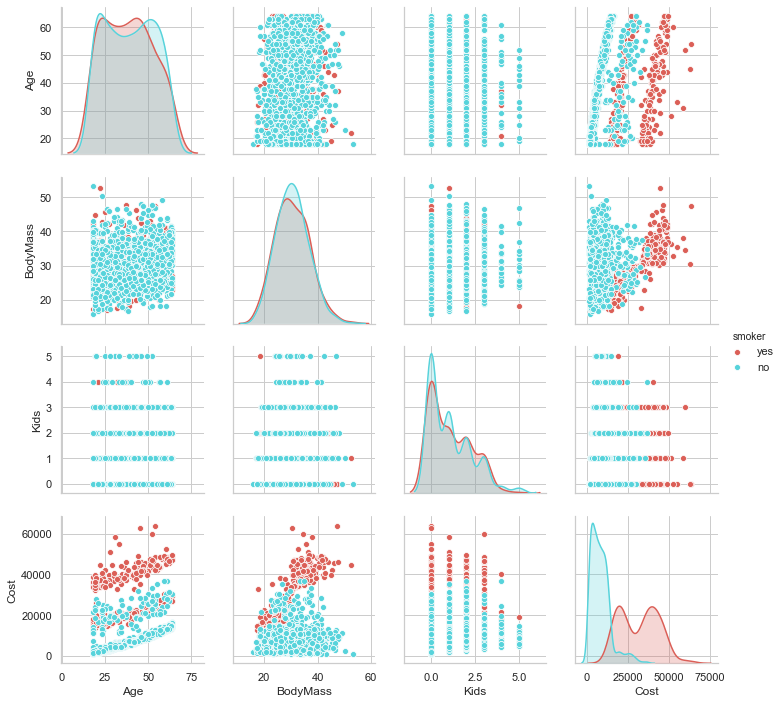

In [11]:
sns.pairplot(data=df4,hue='smoker',palette='hls')

In [12]:
#Detection of outliars using Z-score
#mean of age attribute 39
#std of age attribute 14
temp_d4 = df4['zscore'] = (df4.Cost - df4.Cost.mean())/df4.Cost.std()
temp_d4.head(3)

0    0.294014
1   -0.955447
2   -0.730937
Name: Cost, dtype: float64

In [13]:
threshold = 6
outlier = [] 
for i in df4['BodyMass']: 
    z = (i-30)/6
    if z > threshold: 
        outlier.append(i) 
print('outlier in dataset is', outlier) 

outlier in dataset is []


In [14]:
threshold = 12132
outlier = [] 
for i in df4['Cost']: 
    z = (i-13317)/12132
    if z > threshold: 
        outlier.append(i) 
print('outlier in dataset is', outlier) 

outlier in dataset is []


In [15]:
#detecting the outliars using IQR
Q1 = df4.Cost.quantile(0.25)
Q3 = df4.Cost.quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
temp_df2=df4[(df4['Cost']<lower_limit)|(df4['Cost']>upper_limit)]
temp_df2

,Age,Gender,BodyMass,Kids,smoker,Regional Info,Cost,zscore
14,27.0,male,42.130,0.0,yes,southeast,39611.75770,2.167198
19,30.0,male,35.300,0.0,yes,southwest,36837.46700,1.938536
23,34.0,female,31.920,1.0,yes,northeast,37701.87680,2.009783
29,31.0,male,36.300,2.0,yes,southwest,38711.00000,2.092956
30,22.0,male,35.600,0.0,yes,southwest,35585.57600,1.835353
...,...,...,...,...,...,...,...,...
1300,45.0,male,30.360,0.0,yes,southeast,62592.87309,4.061340
1301,62.0,male,30.875,3.0,yes,northwest,46718.16325,2.752920
1303,43.0,male,27.800,0.0,yes,southwest,37829.72420,2.020320
1313,19.0,female,34.700,2.0,yes,southwest,36397.57600,1.902280


In [16]:
#detecting the outliars using IQR
Q1 = df4.Age.quantile(0.25)
Q3 = df4.Age.quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
df4[(df4['Age']<lower_limit)|(df4['Age']>upper_limit)]

,Age,Gender,BodyMass,Kids,smoker,Regional Info,Cost,zscore


In [17]:
df4.drop(['zscore'], axis=1,inplace=True)

In [18]:
#detecting the outliars using IQR
Q1 = df4.BodyMass.quantile(0.25)
Q3 = df4.BodyMass.quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
temp_df1 = df4[(df4['BodyMass']<lower_limit)|(df4['BodyMass']>upper_limit)]
temp_df1

,Age,Gender,BodyMass,Kids,smoker,Regional Info,Cost
116,58.0,male,49.06,0.0,no,southeast,11381.32540
286,46.0,female,48.07,2.0,no,northeast,9432.92530
401,47.0,male,47.52,1.0,no,southeast,8083.91980
543,54.0,female,47.41,0.0,yes,southeast,63770.42801
847,23.0,male,50.38,1.0,no,southeast,2438.05520
860,37.0,female,47.60,2.0,yes,southwest,46113.51100
1047,22.0,male,52.58,1.0,yes,southeast,44501.39820
1088,52.0,male,47.74,1.0,no,southeast,9748.91060
1317,18.0,male,53.13,0.0,no,southeast,1163.46270


In [19]:
#Encoding the catagorical data
df_dummy = pd.get_dummies(df4,drop_first=True)

In [20]:
df_dummy.head(5)

,Age,BodyMass,Kids,Cost,Gender_male,smoker_yes,Regional Info_northwest,Regional Info_southeast,Regional Info_southwest
0,19.0,27.900,0.0,16884.92400,0,1,0,0,1
1,18.0,33.770,1.0,1725.55230,1,0,0,1,0
2,28.0,33.000,3.0,4449.46200,1,0,0,1,0
3,33.0,22.705,0.0,21984.47061,1,0,1,0,0
4,32.0,28.880,0.0,3866.85520,1,0,1,0,0


In [21]:
df_dummy.columns

Index(['Age', 'BodyMass', 'Kids', 'Cost', 'Gender_male', 'smoker_yes',
       'Regional Info_northwest', 'Regional Info_southeast',
       'Regional Info_southwest'],
      dtype='object')

In [22]:
df_dummy = df_dummy[['Age', 'BodyMass', 'Kids', 'Gender_male', 'smoker_yes',
       'Regional Info_northwest', 'Regional Info_southeast',
       'Regional Info_southwest','Cost']]

In [23]:
df_dummy.head(3)

,Age,BodyMass,Kids,Gender_male,smoker_yes,Regional Info_northwest,Regional Info_southeast,Regional Info_southwest,Cost
0,19.0,27.90,0.0,0,1,0,0,1,16884.9240
1,18.0,33.77,1.0,1,0,0,1,0,1725.5523
2,28.0,33.00,3.0,1,0,0,1,0,4449.4620


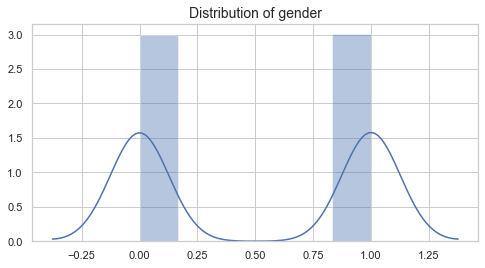

In [24]:
#checking the distribution of catogorical data
plt.figure(figsize=[8,4])
gender_values = df_dummy['Gender_male'].values
sns.distplot(gender_values,color='b')
plt.title('Distribution of gender', fontsize=14)
plt.show()

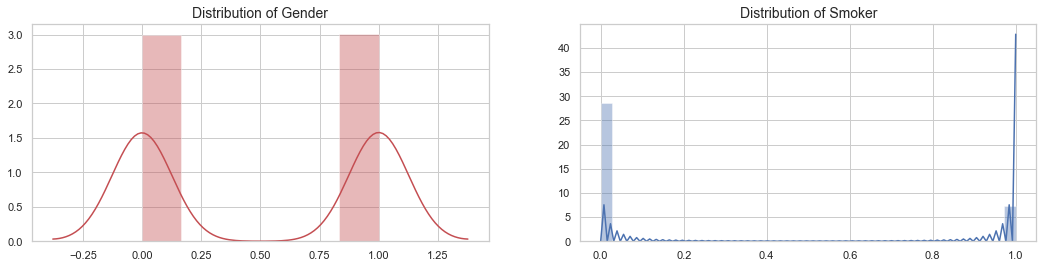

In [25]:
fig,ax= plt.subplots(1, 2, figsize = (18, 4))
gender_value = df_dummy['Gender_male'].values
smoker_value = df_dummy['smoker_yes'].values


sns.distplot(gender_value, ax=ax[0], color='r')
ax[0].set_title('Distribution of Gender', fontsize = 14)

sns.distplot(smoker_value, ax=ax[1], color = 'b')
ax[1].set_title('Distribution of Smoker', fontsize = 14)


plt.show()



In [26]:
#cross Tabulation
pd.crosstab(df_dummy.Gender_male,df_dummy.smoker_yes)

smoker_yes,0,1
Gender_male,,
0,550,118
1,517,153


In [27]:
pd.crosstab(df_dummy.Age,df_dummy.smoker_yes)

smoker_yes,0,1
Age,,
18.0,57,12
19.0,50,18
20.0,20,9
21.0,26,2
22.0,22,6
23.0,21,7
24.0,22,6
25.0,23,5
26.0,25,3


### Hypothesis testing for statistical evidence

In [28]:
#1:Do charges of people who smoke differs significantly from the people who don't
df_hyp = df_dummy[['smoker_yes','Cost']]
df_hyp.head(3)

,smoker_yes,Cost
0,1,16884.9240
1,0,1725.5523
2,0,4449.4620


In [29]:
#taking smoker population with there cost
df1_hyp1 = df_hyp[(df_hyp['smoker_yes']==1)&(df_hyp['Cost'])]
df1_hyp1.head()

,smoker_yes,Cost
0,1,16884.9240
11,1,27808.7251
14,1,39611.7577
19,1,36837.4670
23,1,37701.8768


In [133]:
print('Total no of smokers from actual population:',len(df1_hyp1))

Total no of smokers from actual population: 271


In [31]:
df1_hypt = pd.DataFrame(df1_hyp1)

In [32]:
#taking non-smoker population with there cost
df2_hyp2 = df_hyp[(df_hyp['smoker_yes']==0)&(df_hyp['Cost'])]
df2_hyp2.head()

,smoker_yes,Cost
1,0,1725.55230
2,0,4449.46200
3,0,21984.47061
4,0,3866.85520
5,0,3756.62160


In [134]:
print('Total no of non-smokers from actual population:',len(df2_hyp2))

Total no of non-smokers from actual population: 1058


In [34]:
df2_hypt = pd.DataFrame(df2_hyp2)

In [35]:
from scipy import stats

In [36]:
type(df2_hypt)

pandas.core.frame.DataFrame

In [37]:
#taking sample from smoking customers
df1_hypt1 = df1_hypt.sample(n=40,random_state=1)

In [38]:
#taking sample from non-smoking customers
df0_hypt0 = df2_hypt.sample(n=40,random_state=1)

In [42]:
stats.ttest_ind(df1_hypt1['Cost'],df0_hypt0['Cost'])

Ttest_indResult(statistic=10.296729860059914, pvalue=3.4043858789023275e-16)

##### hyothesis q -Do charges of people who smoke differs significantly from the people who don't
##### Null hypothesis(h0) -  there is  significiant  differnce between charges
##### Alternate hypthesis(ha)- There is a no difference between charges

In [59]:
pvalue=1.2453194970626753e-12
if abs(pvalue)>0.05:
    print("accept null hypothesis - there is  significiant  differnce between charges")
else:
    print("accept alternate hypothesis - There is a no difference between charges")

accept alternate hypothesis - There is a no difference between charges


#### 2:Does bmi of males differ significantly from that of females?
#### null hypothesis- There is signifianct differnce in bmi
#### alternate hypthesis - there is no differnce in bmi

In [45]:
df_bmi = df_dummy[['Gender_male','BodyMass']]
df_bmi.head(3)

,Gender_male,BodyMass
0,0,27.90
1,1,33.77
2,1,33.00


In [46]:
#taking female customers with there body mass
df_bmi0 = df_bmi[(df_bmi['Gender_male']==0) & (df_bmi['BodyMass'])]
df_bmi0.head()

,Gender_male,BodyMass
0,0,27.90
5,0,25.74
6,0,33.44
7,0,27.74
9,0,25.84


In [135]:
print('total no of female customers:',len(df_bmi0))

total no of female customers: 657


In [49]:
df_bmi0 = pd.DataFrame(df_bmi0)

In [50]:
type(df_bmi0)

pandas.core.frame.DataFrame

In [47]:
#taking male customers with there body mass
df_bmi1 = df_bmi[(df_bmi['Gender_male']==1) & (df_bmi['BodyMass'])]
df_bmi1.head()

,Gender_male,BodyMass
1,1,33.770
2,1,33.000
3,1,22.705
4,1,28.880
8,1,29.830


In [136]:
print('total no of male customers:',len(df_bmi1))

total no of male customers: 666


In [52]:
df_bmi1 = pd.DataFrame(df_bmi1)

In [53]:
type(df_bmi1)

pandas.core.frame.DataFrame

In [54]:
#taking sample from female 
df0_bmi0 = df_bmi0.sample(n=60, random_state=1)
df0_bmi0.shape

(60, 2)

In [55]:
#taking sample from male
df1_bmi1 = df_bmi1.sample(n=60, random_state=1)
df1_bmi1.shape

(60, 2)

In [56]:
stats.ttest_ind(df0_bmi0['BodyMass'],df1_bmi1['BodyMass'])

Ttest_indResult(statistic=0.04882499413147938, pvalue=0.9611413084913418)

In [60]:
pvalue=0.9611413084913418
if abs(pvalue)>0.05:
    print("accept null hypothesis - There is signifianct differnce in bmi")
else:
    print("accept alternate hypothesis - there is no differnce in bmi")

accept null hypothesis - There is signifianct differnce in bmi


In [62]:
from statsmodels.stats.proportion import proportions_ztest

##### 3:Is the proportion of smokers significantly different in different genders?
##### null hypothesis = yes the proportion is equal
##### alternate hypothesis = proportion is not equal

In [99]:
#checking the proportion by taking sample from population
df_smok = df_dummy[['Gender_male','smoker_yes']]
df_smok.head()

,Gender_male,smoker_yes
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0


In [100]:
#taking male population from actual population
df1_smke1 = df_smok[(df_smok['Gender_male']==1)]

In [103]:
df1_smke1 = pd.DataFrame(df1_smke1)

In [105]:
#taking the sample from male  population
df1_smke11 = df1_smke1.sample(n=100, random_state=1)

In [137]:
print('sample of male:',len(df1_smke11))

sample of male: 100


In [125]:
df1_smke11.head()

,Gender_male,smoker_yes
1062,1,1
1241,1,1
1298,1,0
759,1,1
660,1,0


In [108]:
#checking male smokers from sample male population
df11_smke11 =  df1_smke11[(df1_smke11['smoker_yes']==1)]

In [128]:
print('No of male smokers from sample 100 from male population is:',len(df11_smke11))

No of male smokers from sample 100 from male population is: 22


In [127]:
# female population
df0_smke0 = df_smok[(df_smok['Gender_male']==0)]
df0_smke0.head()

,Gender_male,smoker_yes
0,0,1
5,0,0
6,0,0
7,0,0
9,0,0


In [112]:
df0_smke0 = pd.DataFrame(df0_smke0)

In [113]:
#taking sample of female from actual female population
df00_smke00 = df0_smke0.sample(n=100, random_state=1)

In [139]:
print('sample of female:',len(df00_smke00))

sample of female: 100


In [115]:
#checking female smokers from sample female population
dff00_smke00 = df00_smke00[(df00_smke00['smoker_yes']==1)] 

In [132]:
print('No of female smokers from sample 100 from female population is:',len(dff00_smke00))

No of female smokers from sample 100 from female population is: 22


In [124]:
no_of_smokers = np.array([22,22])
no_of_samples = np.array([100, 100])
(test_stat,p_value) = proportions_ztest(no_of_smokers,no_of_samples, alternative='two-sided')
print('value of test_stat:',test_stat)
print('value of p:',p_value)

value of test_stat: 0.0
value of p: 1.0


In [140]:
pvalue=1.0
if abs(pvalue)>0.05:
    print("accept null hypothesis -yes the proportion is equal")
else:
    print("accept alternate hypothesis - the proportion is not equal")

accept null hypothesis -yes the proportion is equal


In [145]:
#4:Independence of Males & Females
female = df_dummy[(df_dummy['Gender_male']==0)]

In [146]:
female

,Age,BodyMass,Kids,Gender_male,smoker_yes,Regional Info_northwest,Regional Info_southeast,Regional Info_southwest,Cost
0,19.0,27.90,0.0,0,1,0,0,1,16884.92400
5,31.0,25.74,0.0,0,0,0,1,0,3756.62160
6,46.0,33.44,1.0,0,0,0,1,0,8240.58960
7,37.0,27.74,3.0,0,0,1,0,0,7281.50560
9,60.0,25.84,0.0,0,0,1,0,0,28923.13692
...,...,...,...,...,...,...,...,...,...
1332,52.0,44.70,3.0,0,0,0,0,1,11411.68500
1334,18.0,31.92,0.0,0,0,0,0,0,2205.98080
1335,18.0,36.85,0.0,0,0,0,1,0,1629.83350
1336,21.0,25.80,0.0,0,0,0,0,1,2007.94500


In [147]:
male = df_dummy[(df_dummy['Gender_male']==1)]
male

,Age,BodyMass,Kids,Gender_male,smoker_yes,Regional Info_northwest,Regional Info_southeast,Regional Info_southwest,Cost
1,18.0,33.770,1.0,1,0,0,1,0,1725.55230
2,28.0,33.000,3.0,1,0,0,1,0,4449.46200
3,33.0,22.705,0.0,1,0,1,0,0,21984.47061
4,32.0,28.880,0.0,1,0,1,0,0,3866.85520
8,37.0,29.830,2.0,1,0,0,0,0,6406.41070
...,...,...,...,...,...,...,...,...,...
1324,31.0,25.935,1.0,1,0,1,0,0,4239.89265
1325,61.0,33.535,0.0,1,0,0,0,0,13143.33665
1327,51.0,30.030,1.0,1,0,0,1,0,9377.90470
1329,52.0,38.600,2.0,1,0,0,0,1,10325.20600


In [164]:
pd.crosstab(df_dummy.Gender_male,df_dummy.Gender_male)

Gender_male,0,1
Gender_male,,
0,668,0
1,0,670


In [165]:
##im not understanding the concept of independence

##### Is the distribution of bmi across women with no children, one child and two children, the same?
##### nullhypothesis- yes there is change in bmi having children or not
##### alternate hypothesis - there is no change in bmi distribution

In [248]:
bmk = df_dummy[['Kids','BodyMass']]
bmk.head()

,Kids,BodyMass
0,0.0,27.900
1,1.0,33.770
2,3.0,33.000
3,0.0,22.705
4,0.0,28.880


In [250]:
bm0 = bmk[(bmk['Kids']==0)]
bm0

,Kids,BodyMass
0,0.0,27.900
3,0.0,22.705
4,0.0,28.880
5,0.0,25.740
9,0.0,25.840
...,...,...
1331,0.0,33.400
1334,0.0,31.920
1335,0.0,36.850
1336,0.0,25.800


In [251]:
print('Total number of customers with no children:',len(bm0))

Total number of customers with no children: 569


In [257]:
pd.DataFrame(bm0)
type(bm0)

pandas.core.frame.DataFrame

In [258]:
#taking sample from customers having no kids
bm00 = bm0.sample(n=60, random_state=1)
len(bm00)

60

In [252]:
bm1 = bmk[(bmk['Kids']==1)]
bm1

,Kids,BodyMass
1,1.0,33.770
6,1.0,33.440
15,1.0,24.600
16,1.0,30.780
21,1.0,32.400
...,...,...
1310,1.0,26.315
1312,1.0,42.900
1315,1.0,28.310
1324,1.0,25.935


In [253]:
print('Total number of customers with 1 children:',len(bm1))

Total number of customers with no children: 322


In [259]:
pd.DataFrame(bm1)
type(bm1)

pandas.core.frame.DataFrame

In [260]:
#taking sample from customers having 1 kids
bm11 = bm1.sample(n=60, random_state=1)
len(bm11)

60

In [254]:
bm2= bmk[(bmk['Kids']==2)]
bm2

,Kids,BodyMass
8,2.0,29.830
24,2.0,28.025
27,2.0,32.775
29,2.0,36.300
41,2.0,36.630
...,...,...
1319,2.0,26.315
1323,2.0,40.370
1328,2.0,24.225
1329,2.0,38.600


In [255]:
print('Total number of customers with 2 children:',len(bm2))

Total number of customers with 2 children: 234


In [261]:
pd.DataFrame(bm2)
type(bm2)

pandas.core.frame.DataFrame

In [262]:
#taking sample from customers having 2 kids
bm22 = bm2.sample(n=60, random_state=1)
len(bm22)

60

In [263]:
from scipy.stats import f_oneway

In [268]:
stat, p = f_oneway(bm00.dropna()['BodyMass'], bm11.dropna()['BodyMass'],bm22.dropna()['BodyMass'])

In [269]:
print('stat:',stat)

stat: 0.8327083940761517


In [270]:
print(p)

0.43657579268039626


In [272]:
pvalue=0.43657579268039626
if abs(pvalue)>0.05:
    print("accept null hypothesis -yes there is change in bmi having 1 or 2 children and  no children")
else:
    print("accept alternate hypothesis - there is no change in bmi distribution")

accept null hypothesis -yes there is change in bmi having 1 or 2 children and  no children
